<a href="https://colab.research.google.com/github/matcarvalho/estatistica-dados-imoveis/blob/main/estatistica_banco_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
# Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
#Lendo o arquivo com os dados dos imóveis
df = pd.read_csv("primary_data.csv")

In [188]:
df.columns

Index(['id', 'url', 'header', 'address', 'area', 'rooms', 'bathrooms',
       'garages', 'price', 'condo', 'bairro', 'crawled_at', 'Academia',
       'Aceita animais', 'Acesso para deficientes', 'Aquecimento',
       'Ar-condicionado', 'Armário embutido', 'Armário embutido no quarto',
       'Armário na cozinha', 'Armário no banheiro', 'Bicicletário',
       'Box blindex', 'Cabeamento estruturado', 'Churrasqueira', 'Cinema',
       'Circuito de segurança', 'Closet', 'Condomínio fechado',
       'Conexão à internet', 'Copa', 'Coworking', 'Cozinha',
       'Cozinha americana', 'Cozinha grande', 'Câmera de segurança',
       'Depósito', 'Elevador', 'Escritório', 'Espaço gourmet', 'Espaço teen',
       'Espaço verde / Parque', 'Espelhos d'água', 'Garage band', 'Garagem',
       'Gerador elétrico', 'Gramado', 'Guarita', 'Gás Encanado', 'Interfone',
       'Janela grande', 'Jardim', 'Lareira', 'Lavabo', 'Lavanderia',
       'Mais de um andar', 'Mobiliado', 'Móvel planejado',
       'Perto de

In [189]:
df.head(5)

,id,url,header,address,area,rooms,bathrooms,garages,price,condo,bairro,crawled_at,Academia,Aceita animais,Acesso para deficientes,Aquecimento,Ar-condicionado,Armário embutido,Armário embutido no quarto,Armário na cozinha,Armário no banheiro,Bicicletário,Box blindex,Cabeamento estruturado,Churrasqueira,Cinema,Circuito de segurança,Closet,Condomínio fechado,Conexão à internet,Copa,Coworking,Cozinha,Cozinha americana,Cozinha grande,Câmera de segurança,Depósito,Elevador,Escritório,Espaço gourmet,...,Piscina coberta,Piscina infantil,Piscina para adulto,Piso frio,Pista de cooper,Playground,Portaria 24h,Portão eletrônico,Próximo a escola,Próximo a hospitais,Próximo a shopping,Próximo a transporte público,Quadra de squash,Quadra de tênis,Quadra poliesportiva,Quintal,Recepção,Sala de jantar,Sala de massagem,Salão de festas,Salão de jogos,Sauna,Segurança 24h,Serviços pay per use,Serviços públicos essenciais,Sistema de alarme,Spa,TV a cabo,Varanda,Varanda fechada com vidro,Varanda gourmet,Vigia,Vista para a montanha,Vista para o mar,Área de lazer,Área de serviço,estado,parse_bairro,lat,lon
0,2472650173,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 2 Quartos à Venda, 64m²","Avenida Portugal, 401 - Brooklin, São Paulo - SP",64,2,2,1,715000,778.0,brooklin,2021-06-10 16:17:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,brooklin,-23.612983,-46.679550
1,2510654835,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos à Venda, 170m²","Rua Pensilvânia, 742 - Brooklin, São Paulo - SP",170,3,5,3,2050000,2323.0,brooklin,2021-06-10 16:17:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,SP,brooklin,-23.612118,-46.685606
2,2511557601,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos à Venda, 218m²","Rua Laplace, 44 - Brooklin, São Paulo - SP",218,3,5,4,2520000,2800.0,brooklin,2021-06-10 16:17:00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,SP,brooklin,-23.624983,-46.685161
3,2522220295,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos à Venda, 116m²","Rua Arandu, 660 - Brooklin, São Paulo - SP",116,3,3,0,1450000,1600.0,brooklin,2021-06-10 16:17:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,brooklin,-23.606832,-46.690248
4,2516069997,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 4 Quartos à Venda, 250m²","Rua Flórida, 320 - Brooklin, São Paulo - SP",250,4,6,4,4200000,2500.0,brooklin,2021-06-10 16:17:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,SP,brooklin,-23.615230,-46.683582


# Criando uma função para cortar os dados outliers utilizando o IQR ou percentil

In [190]:
#Função remove outliers com base no percentil
def remove_outliers_percentis(data, bairro, coluna, lower_percentile = 0, max_percentile = .99):
  #Pegando qual é a faixa mínina e máxima dos meus dados de acordo com o percentil definido
  lb, ub = data.loc[data["bairro"] == bairro, coluna].quantile([lower_percentile, max_percentile])
  #Somando a quantidade de elementos não nulos antes da remoção
  len_before = sum(~data.loc[data["bairro"]== bairro, coluna].isnull())
  
  #Removendo os dados
  data.loc[(data["bairro"] == bairro) & (~data[coluna].between(lb, ub)), coluna] = np.nan
  
  #Somando a quantidade de elementos não nulos depois da remoção
  len_after = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
  
  #Printando os resultados
  print(f"Lower Bound: {lb} e Upper Bound: {ub}")
  print(f"Removidos por percentil {round((1-len_after/len_before)*100,5)}% dos dados\n")
  return data

In [191]:
#Função remove outliers pelo IQR
def remove_outliers(data, bairro, coluna, max_removidos = .05):
  #Pegando o meu segundo e terceiro quartil
  q1, q3 = data.loc[data["bairro"] == bairro, coluna].quantile([0.25, 0.75])
  #calculando o IQR
  iqr = q3 - q1
  #Calculando o meu lower bound (Limite inferior)
  lb = max(q1 - 1.5*iqr,0)
  #Calculando o meu upper bound (Limite Superior)
  ub = q3 + 1.5*iqr
    
  #Somando a quantidade de dados nulos na minha base
  len_before = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
  #Somando a quantidade de dados nulos na minha base
  len_after = len(data.loc[(data["bairro"] == bairro) & (data[coluna].between(lb,ub)), coluna])
  #Calculando a porcentagem removida
  removidos = 1-(len_after/len_before)
  
  #Validando se o que será removido é menor que o percentual máximo definido
  if removidos < max_removidos:
    print(f"Lower bound: {lb}, Upper bound: {ub}")
    print(f"{bairro} removidos por IQR: {round(removidos*100,5)}%\n")
    #Definindo como null os meus dados que estão fora do meu limite inferior e superior
    data.loc[(data["bairro"]==bairro) & (~data[coluna].between(lb, ub)), coluna] = np.nan
  else:
    print(f"{bairro}: a remoção por IQR seria {round(removidos*100,3)}%")
    data = remove_outliers_percentis(data, bairro, coluna, lower_percentile = 0, max_percentile = (1-max_removidos))
  return data

# Ajustando os imóveis com áreas outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

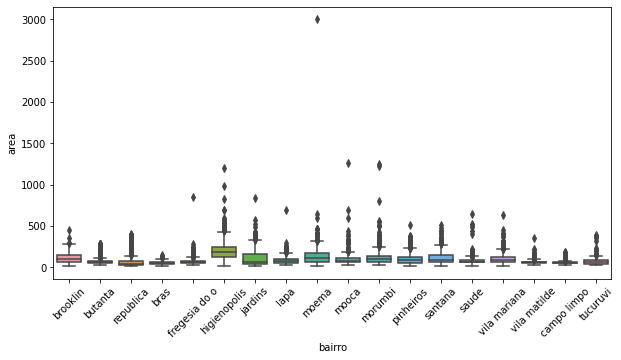

In [192]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "area"]], y="area", x="bairro")
plt.xticks(rotation = 45)

In [193]:
for bairro in df["bairro"].unique():
  df = remove_outliers(df, bairro, "area", max_removidos=.05)

Lower bound: 0, Upper bound: 286.5
brooklin removidos por IQR: 0.48721%

butanta: a remoção por IQR seria 7.015%
Lower Bound: 24.0 e Upper Bound: 132.0
Removidos por percentil 4.99405% dos dados

republica: a remoção por IQR seria 7.78%
Lower Bound: 13.0 e Upper Bound: 205.24999999999864
Removidos por percentil 5.03432% dos dados

bras: a remoção por IQR seria 5.882%
Lower Bound: 19.0 e Upper Bound: 121.0
Removidos por percentil 4.38293% dos dados

fregesia do o: a remoção por IQR seria 6.349%
Lower Bound: 25.0 e Upper Bound: 127.94999999999993
Removidos por percentil 5.10204% dos dados

Lower bound: 0, Upper bound: 432.75
higienopolis removidos por IQR: 3.44828%

Lower bound: 0, Upper bound: 334.0
jardins removidos por IQR: 4.96815%

Lower bound: 0, Upper bound: 176.75
lapa removidos por IQR: 2.83871%

Lower bound: 0, Upper bound: 323.0
moema removidos por IQR: 2.73438%

Lower bound: 0, Upper bound: 190.0
mooca removidos por IQR: 4.92676%

Lower bound: 0, Upper bound: 250.0
morumbi re

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

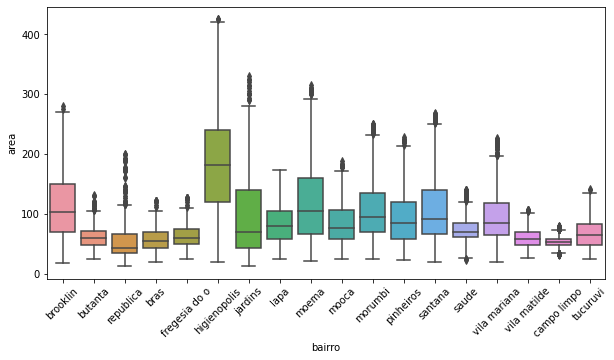

In [194]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "area"]], y="area", x="bairro")
plt.xticks(rotation = 45)

#Limpando os imóveis com Room outliers

In [104]:
#Estou verificando quantos % representam dos meus dados os imóveis com até 6 quartos
df["rooms"].value_counts(normalize=True)[:6].sum()

1.0

In [92]:
#Removendo os imóveis com número de quartos outliers
df.loc[df["rooms"] > 6, "rooms"] = np.nan

#Limpando os imóveis com Bathroom outliers

In [102]:
#Estou verificando quantos % representam dos meus dados os imóveis com até 8 banheiros
df["bathrooms"].value_counts(normalize=True)[:8].sum()

0.9999343961162501

In [93]:
#Removendo os imóveis com número de banheiros outliers
df.loc[df["bathrooms"] > 8, "bathrooms"] = np.nan

#Limpando os imóveis com Garages outliers

In [108]:
#Estou verificando quantos % representam dos meus dados os imóveis com até 6 garagens
df["garages"].value_counts(normalize=True)[:7].sum()

0.997836916622968

In [109]:
#Removendo os imóveis com número de garagens outliers
df.loc[df["garages"] > 6, "garages"] = np.nan

#Limpando os imóveis com preços outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

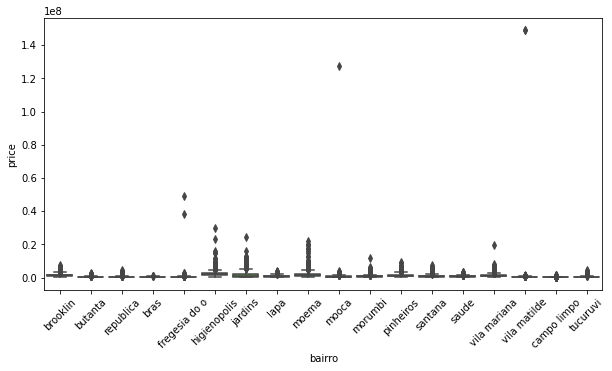

In [195]:
#Plotando um boxplot de preço por bairro
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "price"]], y="price", x="bairro")
plt.xticks(rotation=45)

In [196]:
#Removendo os preços outliers
for bairro in df["bairro"].unique():
  df = remove_outliers(df, bairro, "price")

Lower bound: 0, Upper bound: 3425600.0
brooklin removidos por IQR: 2.67966%

butanta: a remoção por IQR seria 5.945%
Lower Bound: 147100.0 e Upper Bound: 1030000.0
Removidos por percentil 4.99405% dos dados

republica: a remoção por IQR seria 10.755%
Lower Bound: 99000.0 e Upper Bound: 1500000.0
Removidos por percentil 4.91991% dos dados

Lower bound: 0, Upper bound: 920250.0
bras removidos por IQR: 0.5767%

fregesia do o: a remoção por IQR seria 6.463%
Lower Bound: 111111.0 e Upper Bound: 1098479.999999998
Removidos por percentil 5.10204% dos dados

higienopolis: a remoção por IQR seria 8.251%
Lower Bound: 273002.0 e Upper Bound: 6067499.99999999
Removidos por percentil 5.04926% dos dados

jardins: a remoção por IQR seria 8.662%
Lower Bound: 190000.0 e Upper Bound: 6814399.999999999
Removidos por percentil 5.09554% dos dados

Lower bound: 0, Upper bound: 1930000.0
lapa removidos por IQR: 2.58065%

moema: a remoção por IQR seria 6.51%
Lower Bound: 175000.0 e Upper Bound: 5740999.999999

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

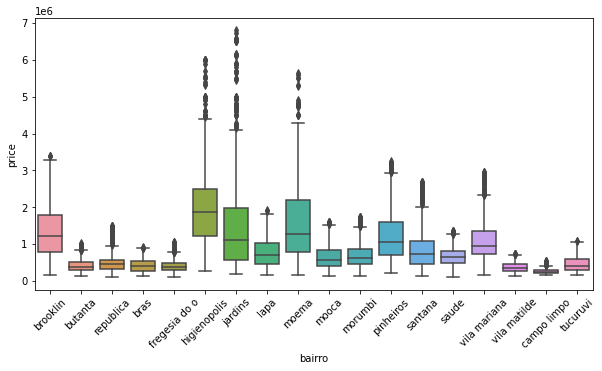

In [197]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "price"]], y="price", x="bairro")
plt.xticks(rotation=45)

#Limpando os imóveis com valores de condomínios outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

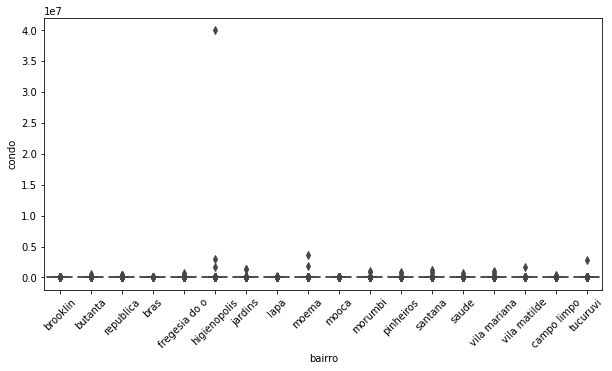

In [198]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "condo"]], y="condo", x="bairro")
plt.xticks(rotation=45)

In [199]:
#Realizando uma descrição dos dados
df["condo"].describe()

count    1.326000e+04
mean     6.421051e+03
std      3.532064e+05
min      1.000000e+00
25%      4.770000e+02
50%      7.370000e+02
75%      1.200000e+03
max      4.000890e+07
Name: condo, dtype: float64

In [201]:
#Tem alguns registros com o valor de condomínio de 1 real.
df["condo"].quantile(0.025)
#Vou realizar um corte em 2,5% dos meus dados. Tudo que estiver abaixo será eliminado
df.loc[df["condo"] < 100, "condo"] = np.nan

In [202]:
#Removendo os outliers
for bairro in df["bairro"].unique():
  df = remove_outliers(df, bairro, "condo")

Lower bound: 0, Upper bound: 2777.0
brooklin removidos por IQR: 3.27169%

Lower bound: 0, Upper bound: 1305.0
butanta removidos por IQR: 3.08555%

republica: a remoção por IQR seria 9.648%
Lower Bound: 100.0 e Upper Bound: 1474.9999999999966
Removidos por percentil 5.08475% dos dados

Lower bound: 0, Upper bound: 890.5
bras removidos por IQR: 2.2293%

fregesia do o: a remoção por IQR seria 7.743%
Lower Bound: 100.0 e Upper Bound: 1222.95
Removidos por percentil 5.11811% dos dados

higienopolis: a remoção por IQR seria 5.29%
Lower Bound: 111.0 e Upper Bound: 6219.0
Removidos por percentil 4.53401% dos dados

jardins: a remoção por IQR seria 6.922%
Lower Bound: 133.0 e Upper Bound: 4908.000000000002
Removidos por percentil 5.00736% dos dados

lapa: a remoção por IQR seria 5.667%
Lower Bound: 100.0 e Upper Bound: 1700.0
Removidos por percentil 4.83333% dos dados

moema: a remoção por IQR seria 6.114%
Lower Bound: 111.0 e Upper Bound: 4300.0
Removidos por percentil 4.94905% dos dados

mooc

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

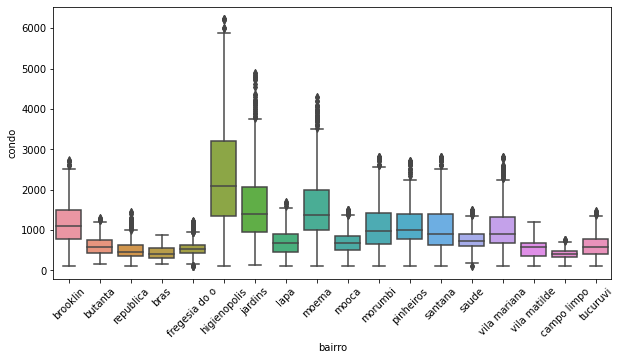

In [203]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "condo"]], y="condo", x="bairro")
plt.xticks(rotation = 45)

#Verificando a relação entre área e preço

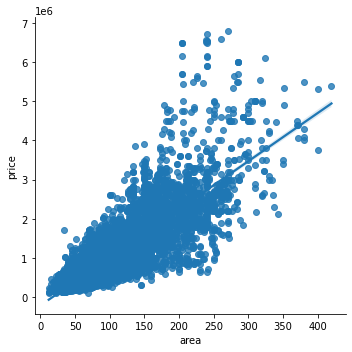

In [204]:
sns.lmplot(data=df, x="area", y="price")

# Analisando a correlação entre as variáveis
- Area, rooms, bathrooms, garages, price e condo

In [205]:
df[df.columns[4:10]].corr()

,area,rooms,bathrooms,garages,price,condo
area,1.000000,0.599647,0.732593,0.526205,0.846341,0.843835
rooms,0.599647,1.000000,0.692417,0.540270,0.426787,0.408548
bathrooms,0.732593,0.692417,1.000000,0.621239,0.641976,0.573445
garages,0.526205,0.540270,0.621239,1.000000,0.450881,0.459556
price,0.846341,0.426787,0.641976,0.450881,1.000000,0.804861
condo,0.843835,0.408548,0.573445,0.459556,0.804861,1.000000


In [206]:
df.to_csv("dados_limpos.csv", index= False)